## AR(3) simulation


Note phi0==0 here: <center> X_t = phi1\*X_(t-1) + phi2\*X_(t-2)+ phi_3\*X_(t-3) + Z_t </center>
<center> Z_t~ N(0, sigma^2) </center>

In [20]:
set.seed(2017)
sigma=4
phi=NULL
phi[1:3]=c(1/3,1/2,7/100)
n=100000

## Simulate AR(3) process


Here we automatically produce a X_t process with mean 0 hence phi0=0 here

In [21]:
ar3.process=arima.sim(n,model=list(ar=c(1/3,1/2, 7/100)), sd=4)

## Plots

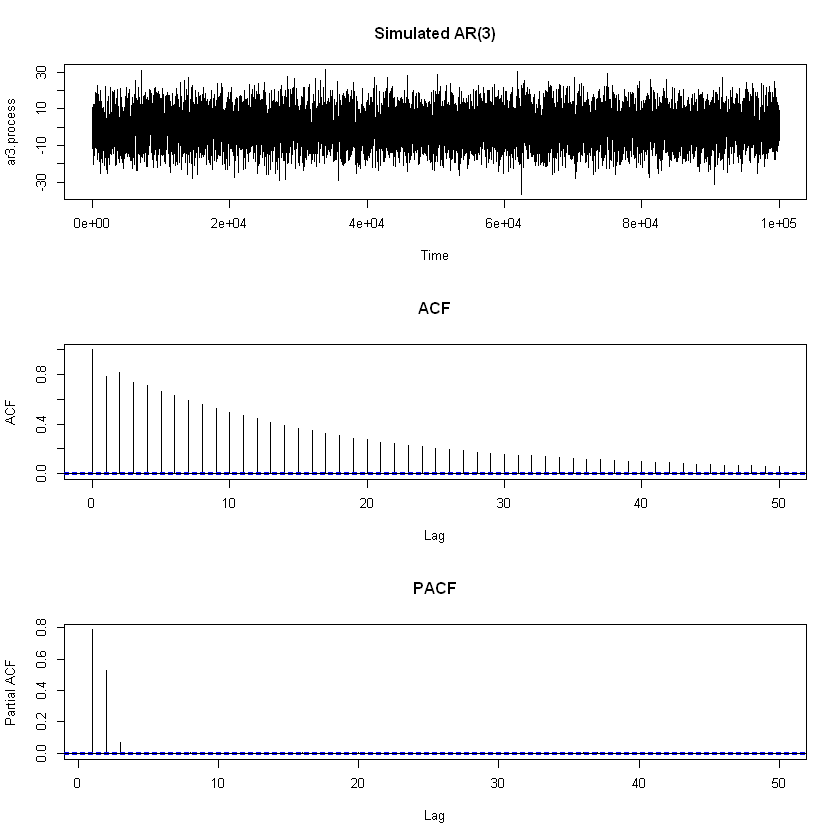

In [22]:
par(mfrow=c(3,1))
plot(ar3.process, main='Simulated AR(3)')
acf(ar3.process, main='ACF')
pacf(ar3.process, main='PACF')

In [23]:
r=NULL
r[1:3]=acf(ar3.process, plot=F)$acf[2:4]
r

[1] 0.7859646 0.8180901 0.7369167

In [24]:
R=matrix(1,3,3) 
R[1,2]=r[1] 
R[1,3]=r[2]
R[2,1]=r[1]
R[2,3]=r[1]
R[3,1]=r[2]
R[3,2]=r[1]
R

1.0000000,0.7859646,0.8180901
0.7859646,1.0000000,0.7859646
0.8180901,0.7859646,1.0000000


In [25]:
# b-column vector on the right
b=matrix(,3,1)# b- column vector with no entries
b[1,1]=r[1]
b[2,1]=r[2]
b[3,1]=r[3]
b

0.7859646
0.8180901
0.7369167


In [26]:
# solve Rx=b and find phi's
phi.hat=solve(R,b)
phi.hat

0.33812448
0.49849991
0.06849712


In [27]:
# sigma estimation
c0=acf(ar3.process, type='covariance', plot=F)$acf[1]
var.hat=c0*(1-sum(phi.hat*r))
var.hat

[1] 15.979